## Rocket Animation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_bvp

In [80]:
def obstacle(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

(8, 960)
(960,)


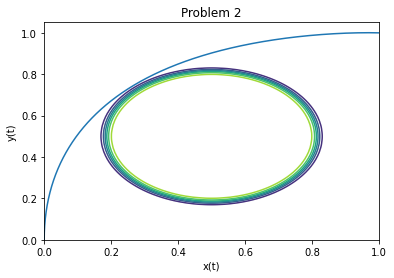

In [16]:

'''
Find the optimal path for the fixed time horizon problem
'''    
t0 = 0
tf = 1
W = 10
r = (.1,.1)

# C = 10
# c_x = 0.5
# c_y = .5
# r = 1/3


def ode(t, y_val): #define the ode systen
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    # print(np.shape(x))
    # print(np.shape(p))
    new_p0 = obstacle_dx(x,y,W,r)
    new_p1 =  obstacle_dy(x,y,W,r)
    return np.array([xp, yp, p2, p3, new_p0,new_p1, -p0, -p1])

def bc(ya,yb):
# ya are the initial values
# yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-3,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linsapces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)
Z = obstacle(X,Y,W,r) #find Z 
# element 4: the initial guess.
y0 = np.ones((8,t_steps))*3
# Solve the system.
sol = solve_bvp(ode, bc, t, y0, max_nodes=30000)
print(sol.y.shape)

#plot the solutions and label everything
plt.plot(sol.y[0], sol.y[1])
print(sol.y[1].shape)
plt.contour(X,Y,Z)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Problem 2')
plt.show()
#set the intial conditions and yo
# t_steps = 200
# # t = np.linspace(t0,tf,t_steps)
# # x = np.linspace(0,1,t_steps)

# y0 = np.ones((8,t_steps))
# # p0 = np.array([1,1])
# # Solve the system.

# sol = solve_bvp(ode, bc, t, y0,max_nodes=50000)
# t_steps = 200 #set the time steps and linsapces
# t = np.linspace(t0,tf,t_steps)
# x = np.linspace(t0,1,t_steps)
# y = np.linspace(t0,1,t_steps)
# X,Y = np.meshgrid(x,y)
# Z = obstacle(X,Y,W,r) #find Z 
# # element 4: the initial guess.
# y0 = np.ones((8,t_steps))*3
# # Solve the system.
# sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

# #plot the solutions and label everything
# plt.plot(sol.y[0], sol.y[1])
# plt.contour(X,Y,Z)
# plt.xlabel('x(t)')
# plt.ylabel('y(t)')
# plt.title('Problem 2')
# plt.show()

# plt.plot(sol.x, 5/(4*np.pi)*sol.y[3])
# plt.xlabel('t')
# plt.ylabel('u(t)')
# plt.title('Problem 1')
# plt.show()

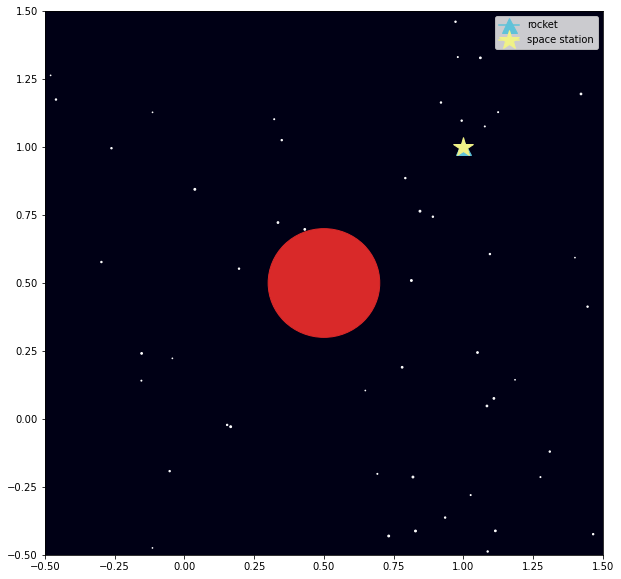

In [25]:
plt.ioff()
#get data
path_length=len(sol.y[1])
ts = range(path_length+50)
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')
#get path
path=np.vstack((sol.y[0], sol.y[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)
#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)
#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')
#asteroid dots
asteroid1=plt.Circle((.5,.5), 1/5, color='#D92929')
ax.add_patch(asteroid1)
ax.plot(1,1, color='#F0F287', label='space station', markersize=20, marker="*")
ax.legend()
def update(t):
    if t<50:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-50
    else:
        s=t-50
        p=t
    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    #update rocket
    rocket.set_data(path[p,0],path[p,1])
#save and show
ani = FuncAnimation(fig, update, frames=ts, interval=20)
ani.save('rocket1.mp4')

<video src="rocket1.mp4" controls>

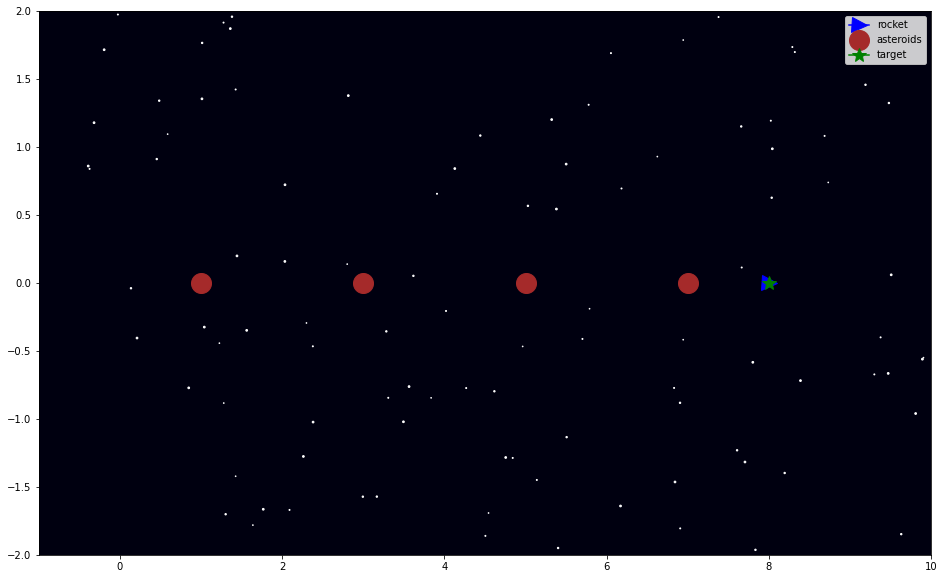

In [17]:
plt.ioff()
#get data
ts = range(250)
fig = plt.figure()
fig.set_size_inches(16, 10)
ax = fig.add_subplot(111)
#set limits
xs=np.linspace(0, 8, 200)
ax.set_xlim([-1,10])
ax.set_ylim([-2,2])
ax.set_facecolor('#000010')
#get path
path=np.array([np.sin(np.pi*x/2)/5 for x in xs])
path=np.vstack((xs,path)).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)
#plot rocket
rocket, = ax.plot([], [],'b', label='rocket', marker='>', markersize=15)
#asteroid dots
ax.plot([1,3,5,7], [0,0,0,0], 'o', color='brown', label='asteroids', markersize=20)
starx=np.random.uniform(-1,10,size=100)
stary=np.random.uniform(-2,2,size= 100)
sizes=np.random.choice([.5,1,2,3], size=100)
ax.scatter(starx, stary, s=sizes, color='white')
ax.plot(8,0, color='green', label='target', markersize=15, marker="*")
ax.legend()
def update(t):
    if t<50:
        s=0
        p=t
    elif t>199:
        p=199
        s=t-50
    else:
        s=t-50
        p=t
    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    #update rocket
    rocket.set_data(path[p,0],path[p,1])
#save and show
ani = FuncAnimation(fig, update, frames=ts, interval=20)
ani.save('animation1.mp4')

<video src="animation1.mp4" controls>

<video src="animation1.mp4" controls>

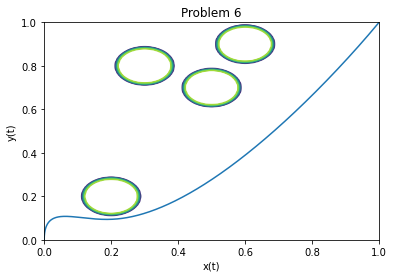

In [81]:

'''
Find the optimal path for the fixed time horizon problem
'''    
t0 = 0
tf = 1
W = 100000
r = (.007,.007)
c1 = (.2,.2)
c2 = (.6,.9)
c3 = (.3,.8)
c4 = (.5,.7)

# C = 10
# c_x = 0.5
# c_y = .5
# r = 1/3


def ode(t, y_val): #define the ode systen
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    # print(np.shape(x))
    # print(np.shape(p))
    zeros = np.zeros_like(x)
    new_p0 = obstacle_dx(x,y,W,r,c1) + obstacle_dx(x,y,W,r,c2) + obstacle_dx(x,y,W,r,c3) + obstacle_dx(x,y,W,r,c4)
    new_p1 =  obstacle_dy(x,y,W,r,c1) + obstacle_dy(x,y,W,r,c2) + obstacle_dy(x,y,W,r,c3) + obstacle_dy(x,y,W,r,c4)
    return np.array([xp, yp, p2, p3, new_p0,new_p1, -p0, -p1])

def bc(ya,yb):
# ya are the initial values
# yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linsapces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)
Z1 = obstacle(X,Y,W,r,c1) #find Z 
Z2 = obstacle(X,Y,W,r,c2) #find Z 
Z3 = obstacle(X,Y,W,r,c3)
Z4 = obstacle(X,Y,W,r,c4)
# element 4: the initial guess.
y0 = np.ones((8,t_steps))*3
# Solve the system.
sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

#plot the solutions and label everything
plt.plot(sol.y[0], sol.y[1])
plt.contour(X,Y,Z1)
plt.contour(X,Y,Z2)
plt.contour(X,Y,Z3)
plt.contour(X,Y,Z4)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Problem 6')
plt.show()
#set the intial conditions and yo
# t_steps = 200
# # t = np.linspace(t0,tf,t_steps)
# # x = np.linspace(0,1,t_steps)

# y0 = np.ones((8,t_steps))
# # p0 = np.array([1,1])
# # Solve the system.

# sol = solve_bvp(ode, bc, t, y0,max_nodes=50000)
# t_steps = 200 #set the time steps and linsapces
# t = np.linspace(t0,tf,t_steps)
# x = np.linspace(t0,1,t_steps)
# y = np.linspace(t0,1,t_steps)
# X,Y = np.meshgrid(x,y)
# Z = obstacle(X,Y,W,r) #find Z 
# # element 4: the initial guess.
# y0 = np.ones((8,t_steps))*3
# # Solve the system.
# sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

# #plot the solutions and label everything
# plt.plot(sol.y[0], sol.y[1])
# plt.contour(X,Y,Z)
# plt.xlabel('x(t)')
# plt.ylabel('y(t)')
# plt.title('Problem 2')
# plt.show()

# plt.plot(sol.x, 5/(4*np.pi)*sol.y[3])
# plt.xlabel('t')
# plt.ylabel('u(t)')
# plt.title('Problem 1')
# plt.show()

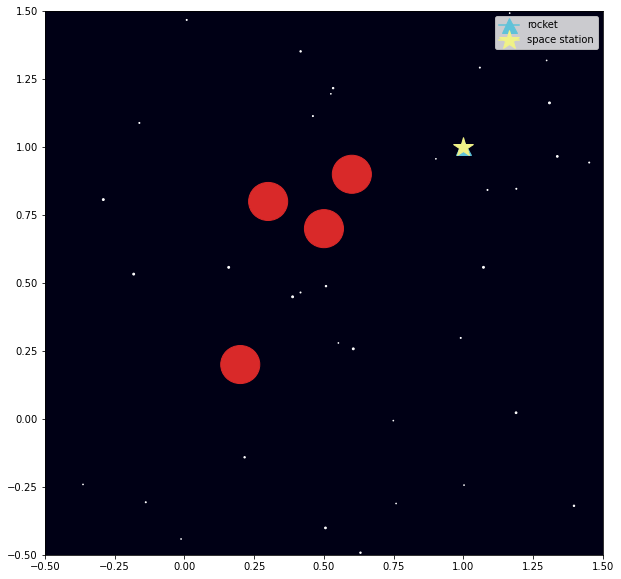

In [82]:
plt.ioff()
#get data
path_length=len(sol.y[1])
tail_length=50
ts = range(path_length+50)
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')
#get path
path=np.vstack((sol.y[0], sol.y[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)
#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)
ax.legend(prop={'family': 'Arial'})
#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')
#asteroid dots
asteroid1=plt.Circle((.2,.2), .07, color='#D92929')
asteroid2=plt.Circle((.6,.9), .07, color='#D92929')
asteroid3=plt.Circle((.3,.8), .07, color='#D92929')
asteroid4=plt.Circle((.5,.7), .07, color='#D92929')
ax.add_patch(asteroid1)
ax.add_patch(asteroid2)
ax.add_patch(asteroid3)
ax.add_patch(asteroid4)
ax.plot(1,1, color='#F0F287', label='space station', markersize=20, marker="*")
ax.legend()
def update(t):
    if t<tail_length:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-tail_length
    else:
        s=t-tail_length
        p=t
    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    #update rocket
    rocket.set_data(path[p,0],path[p,1])
#save and show
ani = FuncAnimation(fig, update, frames=ts, interval=10)
ani.save('rocket_4asteroids.mp4')

<video src="rocket_4asteroids.mp4" controls>

In [48]:
def obstacle2(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx2(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40* W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy2(x,y,W1=1,r=(1/5,1/5),c=(1/2,1/2)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

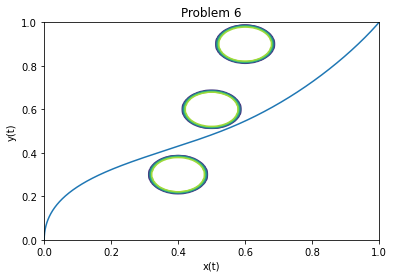

In [25]:

'''
Find the optimal path for the fixed time horizon problem
'''    
t0 = 0
tf = 1
W = 10000
r = (.007,.007)
c1 = (.2,.2)
c2 = (.6,.9)
c3 = (.4,.3)
c4 = (.5,.6)

# C = 10
# c_x = 0.5
# c_y = .5
# r = 1/3


def ode(t, y_val): #define the ode systen
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    # print(np.shape(x))
    # print(np.shape(p))
    zeros = np.zeros_like(x)
    new_p0 = obstacle_dx2(x,y,W,r,c4) + obstacle_dx2(x,y,W,r,c2) + obstacle_dx2(x,y,W,r,c3)# + obstacle_dx2(x,y,W,r,c1)
    new_p1 =  obstacle_dy2(x,y,W,r,c4) + obstacle_dy2(x,y,W,r,c2) + obstacle_dy2(x,y,W,r,c3)# + obstacle_dy2(x,y,W,r,c1)
    return np.array([xp, yp, p2, p3, new_p0, new_p1, -p0, -p1])

def bc(ya,yb):
# ya are the initial values
# yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linsapces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)
Z1 = obstacle2(X,Y,W,r,c1) #find Z 
Z2 = obstacle2(X,Y,W,r,c2) #find Z 
Z3 = obstacle2(X,Y,W,r,c3)
Z4 = obstacle2(X,Y,W,r,c4)
# element 4: the initial guess.
y0 = np.ones((8,t_steps))*3
# Solve the system.
sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

#plot the solutions and label everything
plt.plot(sol.y[0], sol.y[1])
#plt.contour(X,Y,Z1)
plt.contour(X,Y,Z2)
plt.contour(X,Y,Z3)
plt.contour(X,Y,Z4)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Problem 6')
plt.show()

In [35]:
print(sol.y.shape)
mypath=np.column_stack((sol.y[:,int(10*i)] for i in range(int(6777/10))))

(8, 6777)


C:\Users\McKay Shields\AppData\Local\Temp\ipykernel_21048\2676705978.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mypath=np.column_stack((sol.y[:,int(10*i)] for i in range(int(6777/10))))


In [36]:
mypath.shape

(8, 677)

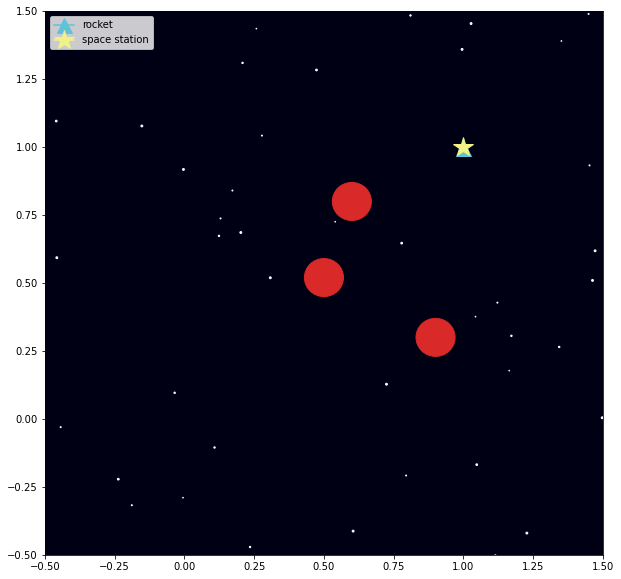

In [66]:
plt.ioff()
#get data
path_length=len(mypath[1])
tail_length=50
ts = range(path_length+50)
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')
#get path
path=np.vstack((mypath[0], mypath[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)
#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)
ax.legend(prop={'family': 'Arial'})
#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')
#asteroid dots
asteroid1=plt.Circle(c4, .07, color='#D92929')
asteroid2=plt.Circle(c2, .07, color='#D92929')
asteroid3=plt.Circle(c3, .07, color='#D92929')
#asteroid4=plt.Circle((.5,.7), .07, color='#D92929')
ax.add_patch(asteroid1)
ax.add_patch(asteroid2)
ax.add_patch(asteroid3)
#ax.add_patch(asteroid4)
ax.plot(1,1, color='#F0F287', label='space station', markersize=20, marker="*")
ax.legend()
def update(t):
    if t<tail_length:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-tail_length
    else:
        s=t-tail_length
        p=t
    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    #update rocket
    rocket.set_data(path[p,0],path[p,1])
#save and show
ani = FuncAnimation(fig, update, frames=ts, interval=10)
ani.save('rocket_3asteroids.mp4')

<video src="rocket_3asteroids.mp4" controls>

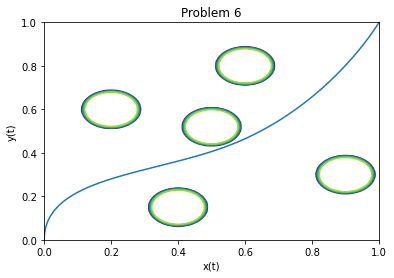

In [63]:

'''
Find the optimal path for the fixed time horizon problem
'''    
t0 = 0
tf = 1
W = 10000
r = (.007,.007)
c1 = (.4,.15)
c2 = (.6,.8)
c3 = (.9,.3)
c4 = (.5,.52)
c5 = (.2,.6)

# C = 10
# c_x = 0.5
# c_y = .5
# r = 1/3


def ode(t, y_val): #define the ode systen
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    # print(np.shape(x))
    # print(np.shape(p))
    zeros = np.zeros_like(x)
    new_p0 = obstacle_dx2(x,y,W,r,c4) + obstacle_dx2(x,y,W,r,c2) + obstacle_dx2(x,y,W,r,c3) + obstacle_dx2(x,y,W,r,c1) + obstacle_dx2(x,y,W,r,c5)
    new_p1 =  obstacle_dy2(x,y,W,r,c4) + obstacle_dy2(x,y,W,r,c2) + obstacle_dy2(x,y,W,r,c3) + obstacle_dy2(x,y,W,r,c1) + obstacle_dy2(x,y,W,r,c5)
    return np.array([xp, yp, p2, p3, new_p0, new_p1, -p0, -p1])

def bc(ya,yb):
# ya are the initial values
# yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linsapces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)
Z1 = obstacle2(X,Y,W,r,c1) #find Z 
Z2 = obstacle2(X,Y,W,r,c2) #find Z 
Z3 = obstacle2(X,Y,W,r,c3)
Z4 = obstacle2(X,Y,W,r,c4)
Z5 = obstacle2(X,Y,W,r,c5)
# element 4: the initial guess.
y0 = np.ones((8,t_steps))*3
# Solve the system.
sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

#plot the solutions and label everything
plt.plot(sol.y[0], sol.y[1])
plt.contour(X,Y,Z1)
plt.contour(X,Y,Z2)
plt.contour(X,Y,Z3)
plt.contour(X,Y,Z4)
plt.contour(X,Y,Z5)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Problem 6')
plt.show()

In [64]:
print(sol.y.shape)
mypath=np.column_stack((sol.y[:,int(10*i)] for i in range(int(len(sol.y[1])/10))))

(8, 1026)


C:\Users\McKay Shields\AppData\Local\Temp\ipykernel_21048\1825589059.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mypath=np.column_stack((sol.y[:,int(10*i)] for i in range(int(len(sol.y[1])/10))))


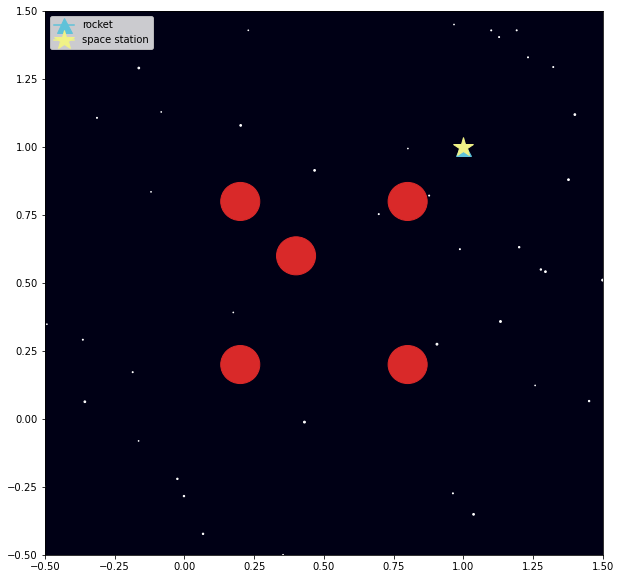

In [74]:
plt.ioff()
#get data
path_length=len(mypath[1])
tail_length=50
ts = range(path_length+50)
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')
#get path
path=np.vstack((mypath[0], mypath[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)
#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)
ax.legend(prop={'family': 'Arial'})
#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')
#asteroid dots
asteroid1=plt.Circle(c1, .07, color='#D92929')
asteroid2=plt.Circle(c2, .07, color='#D92929')
asteroid3=plt.Circle(c3, .07, color='#D92929')
asteroid4=plt.Circle(c4, .07, color='#D92929')
asteroid5=plt.Circle(c5, .07, color='#D92929')
ax.add_patch(asteroid1)
ax.add_patch(asteroid2)
ax.add_patch(asteroid3)
ax.add_patch(asteroid4)
ax.add_patch(asteroid5)
ax.plot(1,1, color='#F0F287', label='space station', markersize=20, marker="*")
ax.legend()
def update(t):
    if t<tail_length:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-tail_length
    else:
        s=t-tail_length
        p=t
    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    #update rocket
    rocket.set_data(path[p,0],path[p,1])
#save and show
ani = FuncAnimation(fig, update, frames=ts, interval=10)
ani.save('rocket_5asteroids.mp4')

<video src="rocket_5asteroids.mp4" contorls>

<video src="rocket_5asteroids.mp4" controls>

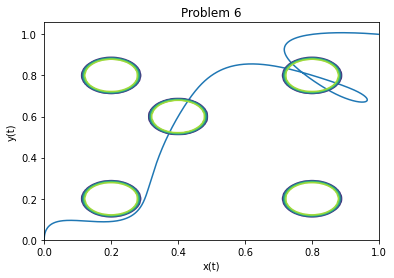

In [83]:

'''
Find the optimal path for the fixed time horizon problem
'''    
t0 = 0
tf = 1
W = 10000
r = (.007,.007)
c1 = (.2,.8)
c2 = (.2,.2)
c3 = (.8,.8)
c4 = (.8,.2)
c5 = (.4,.6)

# C = 10
# c_x = 0.5
# c_y = .5
# r = 1/3


def ode(t, y_val): #define the ode systen
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    # print(np.shape(x))
    # print(np.shape(p))
    zeros = np.zeros_like(x)
    new_p0 = obstacle_dx2(x,y,W,r,c4) + obstacle_dx2(x,y,W,r,c2) + obstacle_dx2(x,y,W,r,c3) + obstacle_dx2(x,y,W,r,c1) + obstacle_dx2(x,y,W,r,c5)
    new_p1 =  obstacle_dy2(x,y,W,r,c4) + obstacle_dy2(x,y,W,r,c2) + obstacle_dy2(x,y,W,r,c3) + obstacle_dy2(x,y,W,r,c1) + obstacle_dy2(x,y,W,r,c5)
    return np.array([xp, yp, p2, p3, new_p0, new_p1, -p0, -p1])

def bc(ya,yb):
# ya are the initial values
# yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linsapces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)
Z1 = obstacle2(X,Y,W,r,c1) #find Z 
Z2 = obstacle2(X,Y,W,r,c2) #find Z 
Z3 = obstacle2(X,Y,W,r,c3)
Z4 = obstacle2(X,Y,W,r,c4)
Z5 = obstacle2(X,Y,W,r,c5)
# element 4: the initial guess.
y0 = np.ones((8,t_steps))*1
# Solve the system.
sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

#plot the solutions and label everything
plt.plot(sol.y[0], sol.y[1])
plt.contour(X,Y,Z1)
plt.contour(X,Y,Z2)
plt.contour(X,Y,Z3)
plt.contour(X,Y,Z4)
plt.contour(X,Y,Z5)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Problem 6')
plt.show()

In [84]:
print(sol.y[1].shape)
mypath=np.column_stack((sol.y[:,int(8*i)] for i in range(int(len(sol.y[1])/8))))

(14633,)


C:\Users\McKay Shields\AppData\Local\Temp\ipykernel_21048\584652632.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mypath=np.column_stack((sol.y[:,int(8*i)] for i in range(int(len(sol.y[1])/8))))


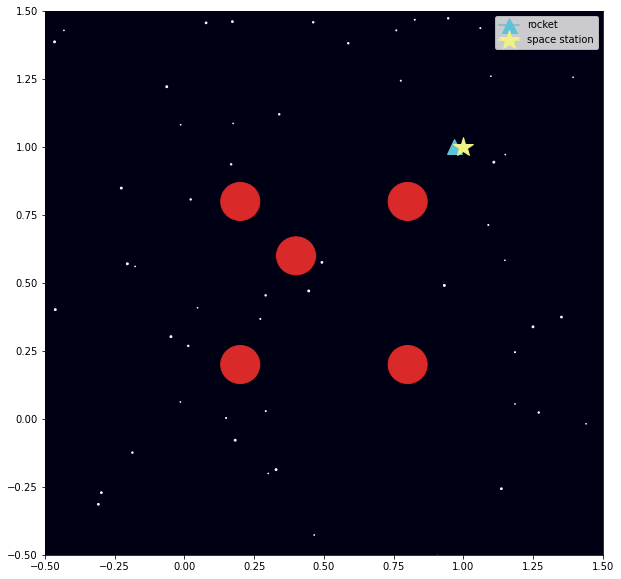

In [85]:
plt.ioff()
#get data
path_length=len(mypath[1])
tail_length=50
ts = range(path_length+50)
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')
#get path
path=np.vstack((mypath[0], mypath[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)
#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)
ax.legend(prop={'family': 'Arial'})
#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')
#asteroid dots
asteroid1=plt.Circle(c1, .07, color='#D92929')
asteroid2=plt.Circle(c2, .07, color='#D92929')
asteroid3=plt.Circle(c3, .07, color='#D92929')
asteroid4=plt.Circle(c4, .07, color='#D92929')
asteroid5=plt.Circle(c5, .07, color='#D92929')
ax.add_patch(asteroid1)
ax.add_patch(asteroid2)
ax.add_patch(asteroid3)
ax.add_patch(asteroid4)
ax.add_patch(asteroid5)
ax.plot(1,1, color='#F0F287', label='space station', markersize=20, marker="*")
ax.legend()
def update(t):
    if t<tail_length:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-tail_length
    else:
        s=t-tail_length
        p=t
    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    #update rocket
    rocket.set_data(path[p,0],path[p,1])
#save and show
ani = FuncAnimation(fig, update, frames=ts, interval=10)
ani.save('failed_example.mp4')

<video src="failed_example.mp4" controls>

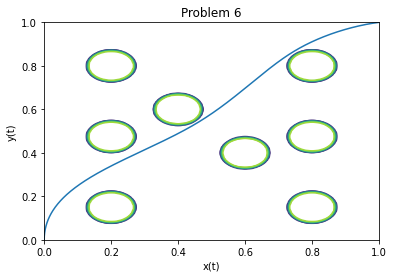

In [105]:

'''
Find the optimal path for the fixed time horizon problem
'''    
t0 = 0
tf = 1
W = 10000
r = (.005,.005)
c1 = (.2,.8)
c2 = (.2,.15)
c3 = (.8,.8)
c4 = (.8,.15)
c5 = (.4,.6)
c6 = (.6,.4)
c7 = (.2,.475)
c8 = (.8,.475)

# C = 10
# c_x = 0.5
# c_y = .5
# r = 1/3


def ode(t, y_val): #define the ode systen
    x, y, xp, yp, p0, p1, p2, p3 = y_val
    # print(np.shape(x))
    # print(np.shape(p))
    zeros = np.zeros_like(x)
    new_p0 = obstacle_dx2(x,y,W,r,c4) + obstacle_dx2(x,y,W,r,c2) + obstacle_dx2(x,y,W,r,c3) + obstacle_dx2(x,y,W,r,c1) + obstacle_dx2(x,y,W,r,c5)+obstacle_dx2(x,y,W,r,c6)
    new_p1 =  obstacle_dy2(x,y,W,r,c4) + obstacle_dy2(x,y,W,r,c2) + obstacle_dy2(x,y,W,r,c3) + obstacle_dy2(x,y,W,r,c1) + obstacle_dy2(x,y,W,r,c5)+obstacle_dy2(x,y,W,r,c6)
    return np.array([xp, yp, p2, p3, new_p0, new_p1, -p0, -p1])

def bc(ya,yb):
# ya are the initial values
# yb are the final values
    return np.array([ya[0],ya[1],ya[2],ya[3]-2,yb[0]-1,yb[1]-1,yb[2],yb[3]])


t_steps = 200 #set the time steps and linsapces
t = np.linspace(t0,tf,t_steps)
x = np.linspace(0,1,t_steps)
y = np.linspace(0,1,t_steps)
X,Y = np.meshgrid(x,y)
Z1 = obstacle2(X,Y,W,r,c1) #find Z 
Z2 = obstacle2(X,Y,W,r,c2) #find Z 
Z3 = obstacle2(X,Y,W,r,c3)
Z4 = obstacle2(X,Y,W,r,c4)
Z5 = obstacle2(X,Y,W,r,c5)
Z6 = obstacle2(X,Y,W,r,c6)
Z7 = obstacle2(X,Y,W,r,c7)
Z8 = obstacle2(X,Y,W,r,c8)
# element 4: the initial guess.
y0 = np.ones((8,t_steps))*1
# Solve the system.
sol = solve_bvp(ode, bc, t, y0,max_nodes=30000)

#plot the solutions and label everything
plt.plot(sol.y[0], sol.y[1])
plt.contour(X,Y,Z1)
plt.contour(X,Y,Z2)
plt.contour(X,Y,Z3)
plt.contour(X,Y,Z4)
plt.contour(X,Y,Z5)
plt.contour(X,Y,Z6)
plt.contour(X,Y,Z7)
plt.contour(X,Y,Z8)
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Problem 6')
plt.show()

In [106]:
print(len(sol.y[1]))
mypath=np.column_stack((sol.y[:,int(3*i)] for i in range(int(len(sol.y[1])/3))))

1323


C:\Users\McKay Shields\AppData\Local\Temp\ipykernel_21048\2490353921.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  mypath=np.column_stack((sol.y[:,int(3*i)] for i in range(int(len(sol.y[1])/3))))


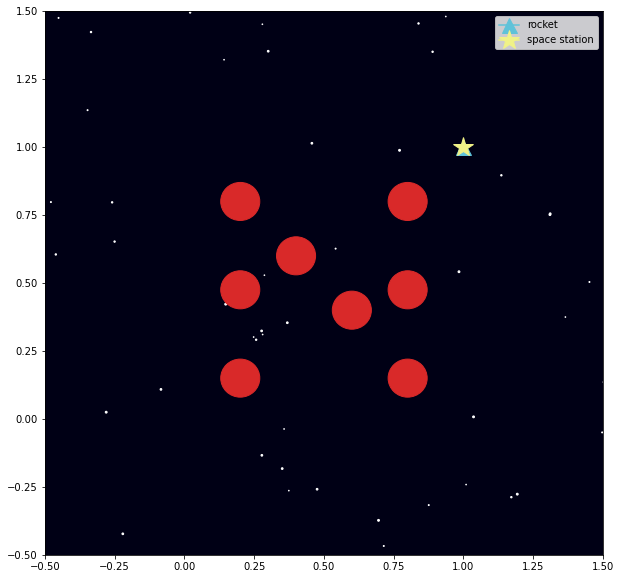

In [107]:
plt.ioff()
#get data
path_length=len(mypath[1])
tail_length=50
ts = range(path_length+50)
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
#set limits
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,1.5])
ax.set_facecolor('#000015')
#get path
path=np.vstack((mypath[0], mypath[1])).T
rocketpath, = ax.plot([], [],'w', alpha=0.4)
#plot rocket
rocket, = ax.plot([], [], color="#5FC2D9", label='rocket', marker='^', markersize=15)
ax.legend(prop={'family': 'Arial'})
#plot stars
starx=np.random.uniform(-1,2,size=100)
stary=np.random.uniform(-1,2,size= 100)
sizes=np.random.choice([.5,1,2,3,3.5], size=100)
ax.scatter(starx, stary, s=sizes, color='white')
#asteroid dots
asteroid1=plt.Circle(c1, .07, color='#D92929')
asteroid2=plt.Circle(c2, .07, color='#D92929')
asteroid3=plt.Circle(c3, .07, color='#D92929')
asteroid4=plt.Circle(c4, .07, color='#D92929')
asteroid5=plt.Circle(c5, .07, color='#D92929')
asteroid6=plt.Circle(c6, .07, color='#D92929')
asteroid7=plt.Circle(c7, .07, color='#D92929')
asteroid8=plt.Circle(c8, .07, color='#D92929')
ax.add_patch(asteroid1)
ax.add_patch(asteroid2)
ax.add_patch(asteroid3)
ax.add_patch(asteroid4)
ax.add_patch(asteroid5)
ax.add_patch(asteroid6)
ax.add_patch(asteroid7)
ax.add_patch(asteroid8)
ax.plot(1,1, color='#F0F287', label='space station', markersize=20, marker="*")
ax.legend()
def update(t):
    if t<tail_length:
        s=0
        p=t
    elif t>path_length-1:
        p=path_length-1
        s=t-tail_length
    else:
        s=t-tail_length
        p=t
    #update path
    rocketpath.set_data(path[s:p,0],path[s:p,1])
    #update rocket
    rocket.set_data(path[p,0],path[p,1])
#save and show
ani = FuncAnimation(fig, update, frames=ts, interval=10)
ani.save('many_asteroids.mp4')

<video src="many_asteroids.mp4" controls>